# Preprocessing

**What is Data Preprocessing?**

Data preprocessing is the process of evaluating, filtering, manipulating, and encoding data so that a machine learning algorithm can understand it and use the resulting output. The major goal of data preprocessing is to eliminate data issues such as missing values, improve data quality, and make the data useful for machine learning purposes.

**Why is it important?**
The significance of Data Preprocessing in Machine Learning cannot be overstated, as it forms the cornerstone of any successful data analysis or machine learning endeavour. In the realm of data-driven technologies, the quality and suitability of data directly influence the outcomes and effectiveness of machine learning models.

**Data Preprocessing involves a series of steps such as:**
1. Data Collection
2. Data Cleaning:
    - Handling Missing Values
    - Removing Duplicates
    - Outlier Detection
    - Correcting Data Errors
3. Data Transformation:
    - Normalization.
    - Standardization.
    - Log Transformation.
    - One-Hot Encoding.
    - Label Encoding.
    - Ordinal Encoding.
4. Feature Engineering:
    - Feature Selection: Select the most relevant features for the model to avoid overfitting and reduce complexity.
    - Feature Extraction: Create new features from existing data (e.g., Principal Component Analysis (PCA) for dimensionality reduction).
    - Polynomial Features: Create higher-order features to capture non-linear relationships.
5. Data Splitting
6. Text and Image-Specific Preprocessing:
    - Text Data: Tokenization, stemming, lemmatization, and removing special characters.
    - Image Data: Resizing, normalization, data augmentation, and noise removal.

## Data Cleaning

Suppose we have all the necessary data; we can proceed with creating a dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/credit_scoring.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


**Data Description:**
- `children` - number of children in the family
- `days_employed` - number of days employed
- `dob_years` - client's age in years
- `education` - client's education level
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - client's gender
- `income_type` - type of employment
- `debt` - whether the client has a loan debt
- `total_income` - monthly income
- `purpose` - purpose of the loan application

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


There are missing values in the columns days_employed and total_income, because the number of rows should be 21,525

In [4]:
df.isna().sum() / len(df)

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

The missing value percentage for both columns are around 10%

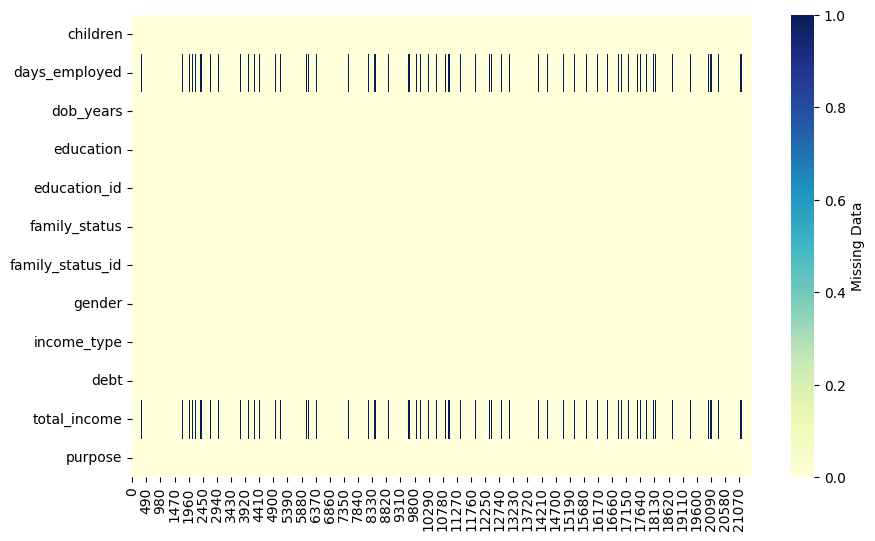

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap='YlGnBu', cbar_kws={'label': 'Missing Data'})
plt.show()

**Findings:**

1. Missing values form a pattern. The missing values are caused by job types where clients with the job types ‘student’ and ‘unemployed’ do not have any income, leading them to leave the ‘days_employed’ and ‘total_income’ columns empty.

2. This conclusion is reinforced by the pattern shown in the seaborn heatmap, indicating that when the value in the ‘days_employed’ column is missing, the data in the same row for ‘total_income’ is also missing (symmetrical).

3. Since the missing values are only present in the ‘days_employed’ and ‘total_income’ columns, and both of these columns have float data types, which fall under the Numeric/Ratio category, the missing data will be filled using statistical calculations (such as Mean, Median).

4. Median is chosen to fill in missing values because it can prevent the occurrence of outliers.

**Using pandas**

In [6]:
df1 = df.select_dtypes('number').copy()

In [7]:
df1.isna().sum()

children               0
days_employed       2174
dob_years              0
education_id           0
family_status_id       0
debt                   0
total_income        2174
dtype: int64

In [8]:
for col in ('days_employed', 'total_income'):
    med_val = df1.median(numeric_only=True).loc[col]
    df1[col] = df1[col].fillna(med_val)

In [9]:
df1.isna().sum()

children            0
days_employed       0
dob_years           0
education_id        0
family_status_id    0
debt                0
total_income        0
dtype: int64

**Using sklearn**

In [10]:
df2 = df.select_dtypes('number').copy()

In [94]:
df2.isna().sum()

children               0
days_employed       2174
dob_years              0
education_id           0
family_status_id       0
debt                   0
total_income        2174
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
imp.fit(df2)

SimpleImputer(strategy='median')

In [96]:
df2 = pd.DataFrame(data=imp.transform(df2), columns=imp.feature_names_in_)

In [97]:
df2.isna().sum()

children            0
days_employed       0
dob_years           0
education_id        0
family_status_id    0
debt                0
total_income        0
dtype: int64

In [98]:
df_object = df.select_dtypes('object')
df = pd.concat([df2, df_object], axis=1)

In [99]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,education,family_status,gender,income_type,purpose
0,1.0,-8437.673028,42.0,0.0,0.0,0.0,253875.639453,masters degree,married,F,employee,purchase of the house
1,1.0,-4024.803754,36.0,1.0,0.0,0.0,112080.014102,secondary education,married,F,employee,car purchase
2,0.0,-5623.422610,33.0,1.0,0.0,0.0,145885.952297,Secondary Education,married,M,employee,purchase of the house
3,3.0,-4124.747207,32.0,1.0,0.0,0.0,267628.550329,secondary education,married,M,employee,supplementary education
4,0.0,340266.072047,53.0,1.0,1.0,0.0,158616.077870,secondary education,civil partnership,F,retiree,to have a wedding


## Handling Outliers

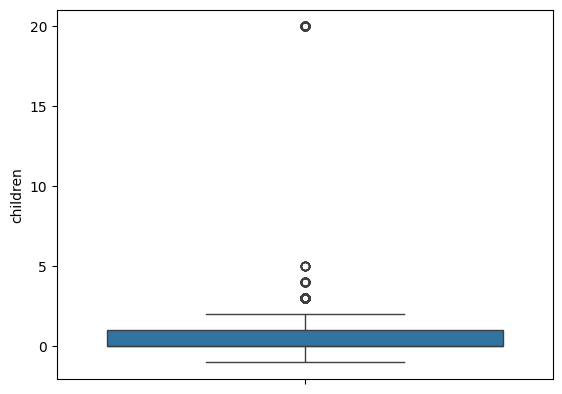

In [102]:
# check outlier in children column
sns.boxplot(df['children'])
plt.show()

In [103]:
# check statistical data in children column
df['children'].describe()

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [104]:
df['children'].quantile(0.95)

np.float64(2.0)

**Findings:**

1. Based on the statistical data above, I will replace the value 20 with the value 2, assuming it was an input error.

2. I will remove the minus sign (-), assuming it was an input error.

In [105]:
# replace the value 20 with the value 2
condition_children = df['children'] == 20
df['children'] = df['children'].mask(condition_children, 2)

In [106]:
# remove minus sign
df['children'] = abs(df['children'])

In [108]:
# verify the data
sorted(df['children'].unique().tolist())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

## Feature Scaling
Feature scaling is a crucial step in data preprocessing, aiming to standardize the values of features or variables within a dataset to a uniform scale. The primary objective is to ensure that all features have a fair influence on the model, avoiding the dominance of features with higher values. The necessity for feature scaling arises when working with datasets that encompass features having diverse ranges, units of measurement, or orders of magnitude. In such scenarios, discrepancies in feature values can introduce bias in model performance or hinder the learning process.

## Standardization

Standardization is **a data preprocessing technique used in machine learning to scale and center features in a dataset**. 

The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

$$ \mu = 0 \text{ and } \sigma = 1 $$
where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called $z$ scores) of the samples are calculated as follows:
$$
z = \frac{x - \mu}{\sigma}
$$
<div style="display:flex;justify-content:center;">
<img src="images/standardizaion_graph.png" />
<img src="images/standardization_formula.png" width=300 />
</div>

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates

$$
\varDelta_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i(t^{(i)} - o^{(i)})x_j^{(i)},
$$
so that

$w_j \coloneqq w_j + \varDelta w_j$, where $\eta$ is the learning rate, $t$ the target class label, and $o$ the actual output. Other intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference.

In fact, the only family of algorithms that I could think of being scale-invariant are tree-based methods. Let’s take the general CART decision tree algorithm. Without going into much depth regarding information gain and impurity measures, we can think of the decision as “is feature $x_i >= \text{some val}$?” Intuitively, we can see that it really doesn’t matter on which scale this feature is (centimeters, Fahrenheit, a standardized scale – it really doesn’t matter).

Some examples of algorithms where feature scaling matters are:

- k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
- linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you’d emphasize variables on “larger measurement scales” more. There are many more cases than I can possibly list here … I always recommend you to think about the algorithm and what it’s doing, and then it typically becomes obvious whether we want to scale your features or not.

In addition, we’d also want to think about whether we want to “standardize” or “normalize” (here: scaling to $[0, 1]$ range) our data. Some algorithms assume that our data is centered at $0$. For example, if we initialize the weights of a small multi-layer perceptron with tanh activation units to $0$ or small random values centered around zero, we want to update the model weights “equally.” As a rule of thumb I’d say: When in doubt, just standardize the data, it shouldn’t hurt.

#### Standardization example 1: NumPy

In [6]:
import numpy as np

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Calculate mean and standard deviation for each column
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

# Standardize data
standardized_data = (data - mean) / std_dev

print("Standardized Data:")
print(standardized_data)


Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Standardized Data:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


#### Standardization example 2: Scikit-Learn

In [7]:
from sklearn.preprocessing import StandardScaler

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
standardized_data_sklearn = scaler.fit_transform(data)

print("Standardized Data:")
print(standardized_data_sklearn)


Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Standardized Data:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


## Min-Max scaling

An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually $0$ to $1$.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X{min}}
$$

<div style="display:flex;justify-content:center;">
<img src="images/normalization_formula.png" />
</div>

#### Normalization example 1: NumPy

In [8]:
import numpy as np

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Calculate min and max for each column
min_val = np.min(data, axis=0)
max_val = np.max(data, axis=0)

# Perform min-max scaling
scaled_data = (data - min_val) / (max_val - min_val)

print("Min-Max Scaled Data:")
print(scaled_data)


Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Min-Max Scaled Data:
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


#### Normalization example 2: Scikit-Learn

In [9]:
from sklearn.preprocessing import MinMaxScaler

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data_sklearn = scaler.fit_transform(data)

print("Min-Max Scaled Data")
print(scaled_data_sklearn)

Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Min-Max Scaled Data
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


## Z-score standardization or Min-Max scaling?

“_Standardization or Min-Max scaling_?” - There is no obvious answer to this question: it really depends on the application.

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix).

However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

<div style="display:flex;justify-content:center;">
<img src="images/standardization_and_normalization.jpg" />
</div>

## Standardizing and normalizing - how it can be done using `scikit-learn`

Of course, we could make use of NumPy’s vectorization capabilities to calculate the z-scores for standardization and to normalize the data using the equations that were mentioned in the previous sections. However, there is an even more convenient approach using the preprocessing module from one of Python’s open-source machine learning library `scikit-learn`.

For the following examples and discussion, we will have a look at the free “Wine” Dataset that is deposited on the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine).


The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to 13 different attributes (features):

1) Alcohol
2) Malic acid \
$\dots$

In [126]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    'data/wine_data.csv',
     usecols=[0,1,2]
    )

df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.sample(5)

,Class label,Alcohol,Malic acid
152,3,13.11,1.90
171,3,12.77,2.39
63,2,12.37,1.13
133,3,12.70,3.55
82,2,12.08,1.13


As we can see in the table above, the features **Alcohol** (percent/volumne) and **Malic acid** (g/l) are measured on different scales, so that **Feature Scaling** is necessary important prior to any comparison or combination of these data.

In [124]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cols = ['Alcohol', 'Malic acid']

std_scale = StandardScaler().fit(df[cols])
df_std = std_scale.transform(df[cols])

minmax_scale = MinMaxScaler().fit(df[cols])
df_minmax = minmax_scale.transform(df[cols])

print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

print('-'*50)

print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00
--------------------------------------------------
Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


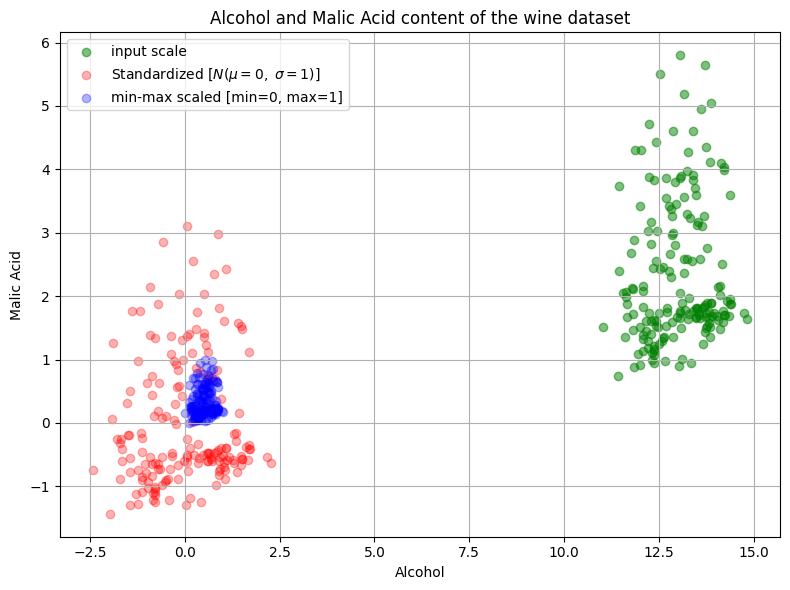

In [18]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

## Robust Scaling

**Robust Scaling** is a technique used to scale data that is robust to outliers. Unlike other scaling methods like **Min-Max Scaling** or **Standardization**, which can be influenced by extreme values, Robust Scaling relies on the median and the interquartile range (IQR). This makes it particularly useful for datasets with significant outliers.


### Formula for Robust Scaling:
$$
X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}
$$

Where:
- **Median** is the middle value of the data.
- **IQR (Interquartile Range)** is the range between the 25th percentile (Q1) and the 75th percentile (Q3):  
  $$
  \text{IQR} = Q3 - Q1
  $$

This formula rescales the feature such that the median becomes 0 and the data is scaled based on the spread of the middle 50% of the data (from Q1 to Q3).


### Key Features of Robust Scaling:
1. **Outlier Resistance**: Robust scaling is less affected by extreme values because it uses the median and IQR instead of the mean and standard deviation.
2. **Data Range**: It centers the data around the median and scales it within the IQR range.

### When to Use Robust Scaling:
- When your dataset contains significant outliers.
- When preserving the impact of outliers isn't critical for your model.
- In models where scaling consistency across features is important. 

**Impementing Robust Scaling With `numpy`**

In [ ]:
data = df.values

# step 1: compute the median
median = np.median(data, axis=0)

# step 2: compute the IQR
q75 = np.percentile(data, 75, axis=0)
q25 = np.percentile(data, 25, axis=0)
iqr = q75 - q25

# step 3: apply the scaling
robust_scaled_data = (data - median) / iqr

# Display results
print("Original Data:\n", data[:5])
print("Median:\n", median)
print("IQR:\n", iqr)
print("Robust Scaled Data:\n", robust_scaled_data[:5])

Original Data:
 [[ 1.   14.23  1.71]
 [ 1.   13.2   1.78]
 [ 1.   13.16  2.36]
 [ 1.   14.37  1.95]
 [ 1.   13.24  2.59]]
Median:
 [ 2.    13.05   1.865]
IQR:
 [ 1.     12.3625  1.6025]
Robust Scaled Data:
 [[-1.          0.09544995 -0.09672387]
 [-1.          0.01213347 -0.05304212]
 [-1.          0.00889788  0.30889236]
 [-1.          0.10677452  0.05304212]
 [-1.          0.01536906  0.4524181 ]]


**Implementing Robust Scaling With `sklearn`**

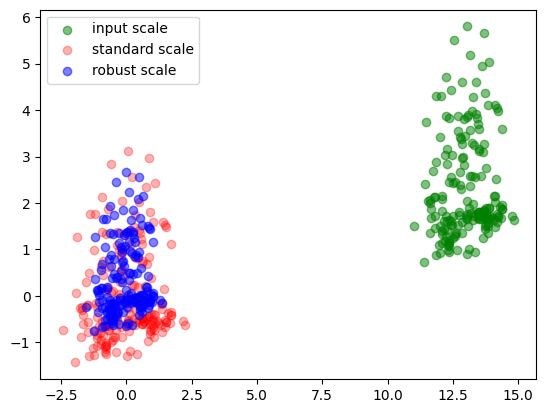

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scale = RobustScaler().fit(df[cols])
df_robust = pd.DataFrame(data=robust_scale.transform(df[cols]), columns=robust_scale.feature_names_in_)

plt.scatter(df['Alcohol'], df['Malic acid'], color='green', alpha=0.5, label='input scale')
plt.scatter(df_std[:,0], df_std[:,1], color='red', label='standard scale', alpha=0.3)
plt.scatter(df_robust['Alcohol'], df_robust['Malic acid'], color='blue', alpha=0.5, label='robust scale')
plt.legend()
plt.show()

## Categorical Encoding

In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

Over your learning curve in AI and Machine Learning, one thing you would notice that most of the algorithms work better with numerical inputs. Therefore, the main challenge faced by an analyst is to convert text/categorical data into numerical data and still make an algorithm/model to make sense out of it. Neural networks, which is a base of deep-learning, expects input values to be numerical.

### Label Encoding

This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only.

|Bridge Type |
|------------|
|Arch        |
|Beam        |
|Truss       |
|Cantilever  |
|Tied Arch   |
|Suspension  |
|Cable       |

We choose to encode the text values by putting a running sequence for each text values like below:

|Bridge Type <br> (Text) | Bridge Type <br> (Numerical) |
|-------------------|-------------------------|
|Arch               | 0                       |
|Beam               | 1                       |
|Truss              | 2                       |
|Cantilever         | 3                       |
|Tied Arch          | 4                       |
|Suspension         | 5                       |
|Cable              | 6                       |

With this, we completed the label-encoding of variable bridge-type. That’s all label encoding is about. But depending upon the data values and type of data, label encoding induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them. Apparently, there is no relation between various bridge type, but when looking at the number, one might think that ‘Cable’ bridge type has higher precedence over ‘Arch’ bridge type. The algorithm might misunderstand that data has some kind of hierarchy/order $0 < 1 < 2 < \dots < 6$ and might give $6\times$ more weight to ‘Cable’ in calculation then than ‘Arch’ bridge type.

Let’s consider another column named ‘Safety Level’. Performing label encoding of this column also induces order/precedence in number, but in the right way. Here the numerical order does not look out-of-box and it makes sense if the algorithm interprets safety order $0 < 1 < 2 < 3 < 4$ i.e. $\text{none} < \text{low} < \text{medium} < \text{high} < \text{very high}$.

|Safety Level <br> (Text) | Safety Level <br> (Numerical) |
|-------------------------|-------------------------------|
|None                     | 0                             |
|Low                      | 1                             |
|Medium                   | 2                             |
|High                     | 3                             |
|Very-High                | 4                             |

**Label Encoding in `pandas`**

This approach requires the category column to be of `category` datatype. By default, a non-numerical column is of `object` type. So you might have to change type to `category` before using this approach.

In [1]:
import pandas as pd

data = {'bridge_types': ['Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable']}
bridge_df = pd.DataFrame(data)

# converting type of columns to 'category'
bridge_df['bridge_types'] = bridge_df['bridge_types'].astype('category')

# assigning numerical values and storing in another column
bridge_df['bridge_types_cat'] = bridge_df['bridge_types'].cat.codes
bridge_df

,bridge_types,bridge_types_cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


**Label Encoding in `sklearn`**

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = {'bridge_types': ['Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable']}
bridge_df = pd.DataFrame(data)

# creating instance of label encoder
l_enc = LabelEncoder()

# assigning numerical values and storing in another column
bridge_df['bridge_types_cat'] = l_enc.fit_transform(bridge_df['bridge_types'])
bridge_df

,bridge_types,bridge_types_cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


### **Ordinal Encoding**

Ordinal encoding is a technique used to encode categorical variables with an inherent order or ranking into numeric values. Unlike label encoding, ordinal encoding is particularly suitable for variables where the sequence of the values has meaning or hierarchy.

**When to Use Ordinal Encoding?**
Ordinal encoding is ideal when:
1. The categorical variable has a clear and logical order (e.g., levels of safety, education degrees).
2. The order matters in the context of your data and the machine learning algorithm should account for it.

**Example of Ordinal Encoding**

Consider the column `Safety Level` from the previous example. Here, the categories have a natural ordering:

| **Safety Level (Text)** | **Safety Level (Numerical)** |
|-------------------------|-----------------------------|
| None                   | 0                           |
| Low                    | 1                           |
| Medium                 | 2                           |
| High                   | 3                           |
| Very High              | 4                           |

This ordering makes sense as "None" is the lowest safety level, and "Very High" is the highest.

**Ordinal Encoding With `pandas`**

In [5]:
import pandas as pd

data = {
    'safety_level': ['None', 'Low', 'Medium', 'High', 'Very High']
}
safety_df = pd.DataFrame(data)

# Define the explicit order for safety levels
order = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}

# Map the 'safety_level' column to numerical values
safety_df['safety_level_num'] = safety_df['safety_level'].map(order)
safety_df

,safety_level,safety_level_num
0,None,0
1,Low,1
2,Medium,2
3,High,3
4,Very High,4


**Ordinal Encoding With `sklearn`**

In [4]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data = {
    'safety_level': ['None', 'Low', 'Medium', 'High', 'Very High']
}
safety_df = pd.DataFrame(data)

# Creating an instance of OrdinalEncoder
ord_enc = OrdinalEncoder(
    categories=[['None', 'Low', 'Medium', 'High', 'Very High']]  # Specifying the order
)

# Transforming the 'safety_level' column
safety_df['safety_level_num'] = ord_enc.fit_transform(safety_df[['safety_level']])
safety_df

,safety_level,safety_level_num
0,None,0.0
1,Low,1.0
2,Medium,2.0
3,High,3.0
4,Very High,4.0


**Key Points to Remember**
1. **Explicit Order**: When using `OrdinalEncoder`, you must explicitly define the order of categories using the `categories` parameter. If not specified, the order will be determined automatically based on the lexicographical order of the labels.
2. **Context Matters**: Use ordinal encoding only if the categories are inherently ordered. If there is no natural ordering, ordinal encoding can mislead the machine learning model.

**Comparison: Label Encoding vs Ordinal Encoding**

| Feature                     | Label Encoding                 | Ordinal Encoding                |
|-----------------------------|---------------------------------|---------------------------------|
| **Purpose**                 | Converts categories to numbers | Encodes categories with a meaningful order |
| **Order**                   | No inherent order assumed      | Assumes inherent order          |
| **When to Use**             | For unordered categories       | For ordered categories          |

### One-Hot Encoding

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called **One-Hot Encoding**.

One-hot encoding is the most widely used categorical encoding technique. It is suitable for nominal categorical variables, where the categories have no inherent order or relationship. The idea behind one-hot encoding is to represent each category as a binary vector. 

Here’s how it works:
- For each category in a categorical column, a new binary column is created
- The binary column will have a value of 1 if the class is present, else it will be zero

For example, if you have a categorical feature `Color` with values `Yellow`, `Blue`, and `Green`, one-hot encoding would convert it into three binary columns:

|Color  | Color_Yellow | Color_Blue | Color_Green |
--------|--------------|------------|--------------
|Yellow | 1            | 0          | 0           |
|Blue   | 0            | 1          | 0           |
|Green  | 0            | 0          | 1           |

**One-Hot Encoding With `pandas`**

In [135]:
import pandas as pd

data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Green']}
df = pd.DataFrame(data)

# perform one-hot encoding using Pandas
one_hot_encoded = pd.get_dummies(df, columns=['Color']).astype(int)
one_hot_encoded

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In this example, we start with a simple data frame `df` that contains a categorical column *Color*. We then use the `pd.get_dummies` function to perform one-hot encoding specifically on the *Color* column. You can also customize one-hot encoding using additional parameters of the `pd.get_dummies` function ([documentation link](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)), such as prefix adding a `prefix` to the new columns and `prefix_sep` specifying a separator between the prefix and the original category name. These parameters can help you make the column names more meaningful in your dataset.

**Pros:** It preserves all information about the categories and doesn’t introduce any ordinal relationship

**Cons:** It can lead to a high dimensionality problem when dealing with a large number of classes

**When to use:** Ideally for categorical features with less than 10 categories.

> Things to note: Dummy encoding is very similar to one-hot encoding but it creates $n-1$ columns for a categorical feature with n categories. It doesn’t create a column for the first category to avoid the [dummy variable trap](https://www.statology.org/dummy-variable-trap/). The dummy variable trap is mostly applicable to linear regression models and we should use dummy encoding when using these models. Simply set the parameter `drop_first` as `True` in `pd.get_dummies` function to use dummy encoding.

**One-Hot Encoding With `sklearn`**

In [150]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(df)
one_hot_encoded = pd.DataFrame(data=enc.transform(df).toarray(), columns=enc.get_feature_names_out()).astype(int)
one_hot_encoded

,Color_Blue,Color_Green,Color_Red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


### Resources for this content

<a href="https://medium.com/womenintechnology/data-preprocessing-steps-for-machine-learning-in-phyton-part-1-18009c6f1153">Data Preprocessing Steps for Machine Learning in Python</a>

<a href="https://lakefs.io/blog/data-preprocessing-in-machine-learning/">Data Preprocessing in Machine Learning: Steps & Best Practices</a>


<a href="https://sebastianraschka.com/Articles/2014_about_feature_scaling.html">About Feature Scaling and Normalization</a>

<a href="https://proclusacademy.com/blog/robust-scaler-outliers/">Robust Scaling: Why and How to Use It to Handle Outliers</a>

<a href="https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b">All you need to know about encoding techniques!</a>

<a href="https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd">Categorical encoding using Label-Encoding and One-Hot-Encoder</a>